### Training deep neural networks

@cesans

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import sys
sys.path.append('../')
import numpy as np

import deep_control as dc

import pandas
import seaborn as sns

### Loading data

Previously generated trajectories can be loaded with *dc.data.load_trajectories*

In [6]:
import glob
import pickle
from tqdm import tqdm

files = glob.glob('../data/simple/*pic')

In [7]:
total = 0
trajs = []
for f in tqdm(files, leave=True):    
        rw = pickle.load(open(f,'rb'))
        for rwi in rw:
            traj = np.hstack((rwi[0], rwi[1]))
            df = pandas.DataFrame(data=traj)
            col_names = ['t', 'x', 'y', 'z', 'vz', 'm', 'u1', 'u2']
            df.columns = col_names
            trajs.append(df)


100%|██████████| 837/837 [00:37<00:00, 21.80it/s]


In [8]:
ini_ps = np.vstack([t.values[0,:] for t in trajs])

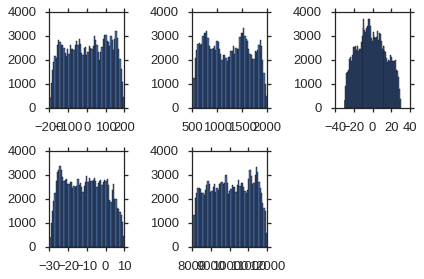

In [9]:
for i in range(3):
    for j in range(2):
        if i!=0 or j!= 0:
            plt.subplot(2,3,i*2+j)
            plt.hist(ini_ps[:,i*2+j],59)
            plt.locator_params(nbins=4)            
            
plt.tight_layout()            

## Training

From the trajectories we can generate the training sets:

In [10]:
train_p = 0.9 # proportion of training data
x_train, y_train, x_test, y_test, idx_train = dc.data.create_training_data(trajs, train_p = train_p, n_outputs=2)

Creating test data: 100%|██████████| 14217/14217 [00:02<00:00, 5644.80it/s]


In [11]:
dc.nn.save_training_data([x_train, y_train, x_test, y_test, idx_train], "indirect_simple")

We specify a model to train

In [12]:
model_description = {"data": "indirect_simple",
                     "control": dc.nn.DTHETA,
                     "nlayers": 3,
                     "units": 32, 
                     "output_mode": dc.nn.OUTPUT_LOG, 
                     "dropout": False,
                     "batch_size": 8, 
                     "epochs": 32, 
                     "lr": 0.001,
                     "input_vars" : 5,
                     "hidden_nonlinearity": "ReLu"}

In [13]:
dc.nn.train(model_description)

=====  MODEL ===========
dropout:False
epochs:32
nlayers:3
input_vars:5
lr:0.001
units:32
batch_size:8
control:1
output_mode:0
hidden_nonlinearity:ReLu
data:indirect_simple
Loading data...
Preprocessing...


Training, epoch 0:   0%|          | 601/1599337 [00:00<04:26, 6009.40it/s]

Training...


Training, epoch 0: 100%|██████████| 1599337/1599337 [04:33<00:00, 5839.23it/s]


epoch 0, train loss: 0.0006373089709322829


Training, epoch 1:   0%|          | 667/1599337 [00:00<08:03, 3305.07it/s]

epoch 0, test loss: 0.00038678372706589824


Training, epoch 1: 100%|██████████| 1599337/1599337 [04:28<00:00, 5949.27it/s]


epoch 1, train loss: 0.0003145514338673121


Training, epoch 2:   0%|          | 1221/1599337 [00:00<04:21, 6110.82it/s]

epoch 1, test loss: 0.00034826741502275133


Training, epoch 2: 100%|██████████| 1599337/1599337 [04:28<00:00, 5951.96it/s]


epoch 2, train loss: 0.00028231348443868125


Training, epoch 3:   0%|          | 619/1599337 [00:00<04:18, 6187.20it/s]

epoch 2, test loss: 0.00032272339936163585


Training, epoch 3: 100%|██████████| 1599337/1599337 [04:26<00:00, 6005.81it/s]


epoch 3, train loss: 0.00026524382633355076


Training, epoch 4:   0%|          | 1255/1599337 [00:00<04:15, 6264.70it/s]

epoch 3, test loss: 0.00029301374043550973


Training, epoch 4: 100%|██████████| 1599337/1599337 [04:22<00:00, 6093.60it/s]


epoch 4, train loss: 0.00025406430961393966


Training, epoch 5:   0%|          | 1270/1599337 [00:00<04:10, 6369.65it/s]

epoch 4, test loss: 0.0002847632829792644


Training, epoch 5: 100%|██████████| 1599337/1599337 [04:21<00:00, 6110.55it/s]


epoch 5, train loss: 0.0002459693709504273


Training, epoch 6:   0%|          | 1264/1599337 [00:00<04:12, 6339.11it/s]

epoch 5, test loss: 0.00027718491134029574


Training, epoch 6: 100%|██████████| 1599337/1599337 [04:20<00:00, 6144.70it/s]


epoch 6, train loss: 0.00023980270751166677


Training, epoch 7:   0%|          | 1261/1599337 [00:00<04:13, 6306.93it/s]

epoch 6, test loss: 0.00026801260270961776


Training, epoch 7: 100%|██████████| 1599337/1599337 [04:20<00:00, 6139.96it/s]


epoch 7, train loss: 0.00023497085227175752


Training, epoch 8:   0%|          | 639/1599337 [00:00<04:10, 6384.57it/s]

epoch 7, test loss: 0.00027158589664055415


Training, epoch 8: 100%|██████████| 1599337/1599337 [04:20<00:00, 6149.88it/s]


epoch 8, train loss: 0.00023088514367892646


Training, epoch 9:   0%|          | 349/1599337 [00:00<07:38, 3486.65it/s]

epoch 8, test loss: 0.0002699031283070909


Training, epoch 9: 100%|██████████| 1599337/1599337 [04:20<00:00, 6128.02it/s]


epoch 9, train loss: 0.00022706499999582385


Training, epoch 10:   0%|          | 642/1599337 [00:00<04:09, 6415.57it/s]

epoch 9, test loss: 0.0002615934125578803


Training, epoch 10: 100%|██████████| 1599337/1599337 [04:20<00:00, 6139.35it/s]


epoch 10, train loss: 0.00022361398960869377


Training, epoch 11:   0%|          | 644/1599337 [00:00<04:08, 6437.54it/s]

epoch 10, test loss: 0.0002545812819024401


Training, epoch 11: 100%|██████████| 1599337/1599337 [04:18<00:00, 6191.37it/s]


epoch 11, train loss: 0.0002206099414499351


Training, epoch 12:   0%|          | 633/1599337 [00:00<04:12, 6329.43it/s]

epoch 11, test loss: 0.00025020702642242855


Training, epoch 12: 100%|██████████| 1599337/1599337 [04:18<00:00, 6178.83it/s]


epoch 12, train loss: 0.00021787508232699553


Training, epoch 13:   0%|          | 1263/1599337 [00:00<04:12, 6332.42it/s]

epoch 12, test loss: 0.00024896506360387675


Training, epoch 13: 100%|██████████| 1599337/1599337 [04:18<00:00, 6184.43it/s]


epoch 13, train loss: 0.00021545353532720685


Training, epoch 14:   0%|          | 1278/1599337 [00:00<04:08, 6430.47it/s]

epoch 13, test loss: 0.0002419421755350103


Training, epoch 14: 100%|██████████| 1599337/1599337 [04:19<00:00, 6156.83it/s]


epoch 14, train loss: 0.00021324852330045817


Training, epoch 15:   0%|          | 1253/1599337 [00:00<04:17, 6210.48it/s]

epoch 14, test loss: 0.00024070578136604039


Training, epoch 15: 100%|██████████| 1599337/1599337 [04:18<00:00, 6175.21it/s]


epoch 15, train loss: 0.00021135411715125812


Training, epoch 16:   0%|          | 638/1599337 [00:00<04:10, 6372.46it/s]

epoch 15, test loss: 0.00023514751740184818


Training, epoch 16: 100%|██████████| 1599337/1599337 [04:18<00:00, 6179.20it/s]


epoch 16, train loss: 0.00020981609693187543


Training, epoch 17:   0%|          | 642/1599337 [00:00<04:09, 6419.70it/s]

epoch 16, test loss: 0.00023336502020343677


Training, epoch 17: 100%|██████████| 1599337/1599337 [04:19<00:00, 6159.07it/s]


epoch 17, train loss: 0.00020819841316942469


Training, epoch 18:   0%|          | 1273/1599337 [00:00<04:10, 6378.89it/s]

epoch 17, test loss: 0.00023193489767034842


Training, epoch 18: 100%|██████████| 1599337/1599337 [04:19<00:00, 6164.11it/s]


epoch 18, train loss: 0.0002065878517426104


Training, epoch 19:   0%|          | 634/1599337 [00:00<04:12, 6336.02it/s]

epoch 18, test loss: 0.0002298832130930101


Training, epoch 19: 100%|██████████| 1599337/1599337 [04:20<00:00, 6149.14it/s]


epoch 19, train loss: 0.00020541967588628312


Training, epoch 20:   0%|          | 645/1599337 [00:00<04:07, 6449.11it/s]

epoch 19, test loss: 0.00022347791530259495


Training, epoch 20: 100%|██████████| 1599337/1599337 [04:19<00:00, 6166.16it/s]


epoch 20, train loss: 0.00020428435429904399


Training, epoch 21:   0%|          | 590/1599337 [00:00<04:31, 5896.63it/s]

epoch 20, test loss: 0.00022200282440475188


Training, epoch 21: 100%|██████████| 1599337/1599337 [04:18<00:00, 6177.46it/s]


epoch 21, train loss: 0.00020309834667505856


Training, epoch 22:   0%|          | 642/1599337 [00:00<04:09, 6412.47it/s]

epoch 21, test loss: 0.00022111317411645034


Training, epoch 22: 100%|██████████| 1599337/1599337 [04:19<00:00, 6164.94it/s]


epoch 22, train loss: 0.00020181982417131347


Training, epoch 23:   0%|          | 641/1599337 [00:00<04:09, 6403.76it/s]

epoch 22, test loss: 0.00022528536136975824


Training, epoch 23: 100%|██████████| 1599337/1599337 [04:18<00:00, 6183.53it/s]


epoch 23, train loss: 0.00020052107563027982


Training, epoch 24:   0%|          | 620/1599337 [00:00<04:18, 6191.67it/s]

epoch 23, test loss: 0.00022343175595769454


Training, epoch 24: 100%|██████████| 1599337/1599337 [04:19<00:00, 6151.41it/s]


epoch 24, train loss: 0.00019946890302249083


Training, epoch 25:   0%|          | 1273/1599337 [00:00<04:09, 6392.99it/s]

epoch 24, test loss: 0.00022021396491714968


Training, epoch 25: 100%|██████████| 1599337/1599337 [04:19<00:00, 6154.01it/s]


epoch 25, train loss: 0.00019872957040264246


Training, epoch 26:   0%|          | 1180/1599337 [00:00<04:33, 5837.73it/s]

epoch 25, test loss: 0.00021158264301140517


Training, epoch 26: 100%|██████████| 1599337/1599337 [04:20<00:00, 6133.03it/s]


epoch 26, train loss: 0.00019762137235072118


Training, epoch 27:   0%|          | 1280/1599337 [00:00<04:08, 6419.56it/s]

epoch 26, test loss: 0.00021146775092180362


Training, epoch 27: 100%|██████████| 1599337/1599337 [04:20<00:00, 6148.90it/s]


epoch 27, train loss: 0.0001970014436394374


Training, epoch 28:   0%|          | 1277/1599337 [00:00<04:10, 6368.84it/s]

epoch 27, test loss: 0.00020529203776629626


Training, epoch 28: 100%|██████████| 1599337/1599337 [04:19<00:00, 6173.29it/s]


epoch 28, train loss: 0.00019614945718388475


Training, epoch 29:   0%|          | 1244/1599337 [00:00<04:14, 6276.44it/s]

epoch 28, test loss: 0.0002051273822630048


Training, epoch 29: 100%|██████████| 1599337/1599337 [04:19<00:00, 6160.94it/s]


epoch 29, train loss: 0.00019554131777298463


Training, epoch 30:   0%|          | 1230/1599337 [00:00<04:19, 6163.60it/s]

epoch 29, test loss: 0.00020333155443615512


Training, epoch 30: 100%|██████████| 1599337/1599337 [04:19<00:00, 6163.65it/s]


epoch 30, train loss: 0.00019447486356765506


Training, epoch 31:   0%|          | 646/1599337 [00:00<04:07, 6456.30it/s]

epoch 30, test loss: 0.00019995808200671603


Training, epoch 31: 100%|██████████| 1599337/1599337 [04:19<00:00, 6155.54it/s]


epoch 31, train loss: 0.00019363944590822165
epoch 31, test loss: 0.0002024154966392771


In [14]:
model_description = {"data": "indirect_simple",
                     "control": dc.nn.THRUST,
                     "nlayers": 3,
                     "units": 32, 
                     "output_mode": dc.nn.OUTPUT_LOG, 
                     "dropout": False,
                     "batch_size": 8, 
                     "epochs": 32, 
                     "lr": 0.001,
                     "input_vars" : 5,
                     "hidden_nonlinearity": "ReLu"}

dc.nn.train(model_description)

=====  MODEL ===========
dropout:False
epochs:32
nlayers:3
input_vars:5
lr:0.001
units:32
batch_size:8
control:0
output_mode:0
hidden_nonlinearity:ReLu
data:indirect_simple
Loading data...
Preprocessing...


Training, epoch 0:   0%|          | 1210/1599337 [00:00<04:24, 6053.25it/s]

Training...


Training, epoch 0: 100%|██████████| 1599337/1599337 [04:21<00:00, 6107.04it/s]


epoch 0, train loss: 0.026168391525138338


Training, epoch 1:   0%|          | 1257/1599337 [00:00<04:13, 6305.44it/s]

epoch 0, test loss: 0.01795889682927498


Training, epoch 1: 100%|██████████| 1599337/1599337 [04:20<00:00, 6134.32it/s]


epoch 1, train loss: 0.016397863851542124


Training, epoch 2:   0%|          | 639/1599337 [00:00<04:10, 6388.09it/s]

epoch 1, test loss: 0.014552717061578268


Training, epoch 2: 100%|██████████| 1599337/1599337 [04:20<00:00, 6130.44it/s]


epoch 2, train loss: 0.014182039551051993


Training, epoch 3:   0%|          | 1264/1599337 [00:00<04:12, 6317.55it/s]

epoch 2, test loss: 0.011745428049299341


Training, epoch 3: 100%|██████████| 1599337/1599337 [04:20<00:00, 6139.87it/s]


epoch 3, train loss: 0.013004314614464404


Training, epoch 4:   0%|          | 646/1599337 [00:00<04:07, 6457.74it/s]

epoch 3, test loss: 0.012039254493471182


Training, epoch 4: 100%|██████████| 1599337/1599337 [04:19<00:00, 6152.71it/s]


epoch 4, train loss: 0.012216422251455802


Training, epoch 5:   0%|          | 1262/1599337 [00:00<04:11, 6349.56it/s]

epoch 4, test loss: 0.01255616228307649


Training, epoch 5: 100%|██████████| 1599337/1599337 [04:20<00:00, 6132.71it/s]


epoch 5, train loss: 0.011635445409559627


Training, epoch 6:   0%|          | 1226/1599337 [00:00<04:20, 6141.73it/s]

epoch 5, test loss: 0.010428335975992863


Training, epoch 6: 100%|██████████| 1599337/1599337 [04:20<00:00, 6132.16it/s]


epoch 6, train loss: 0.011199163313310065


Training, epoch 7:   0%|          | 1226/1599337 [00:00<04:20, 6125.69it/s]

epoch 6, test loss: 0.011257072449460226


Training, epoch 7: 100%|██████████| 1599337/1599337 [04:20<00:00, 6133.38it/s]


epoch 7, train loss: 0.010805480633619718


Training, epoch 8:   0%|          | 635/1599337 [00:00<04:12, 6343.08it/s]

epoch 7, test loss: 0.011219040458674005


Training, epoch 8: 100%|██████████| 1599337/1599337 [04:20<00:00, 6139.20it/s]


epoch 8, train loss: 0.010477973142994541


Training, epoch 9:   0%|          | 632/1599337 [00:00<04:12, 6319.75it/s]

epoch 8, test loss: 0.009545839241257507


Training, epoch 9: 100%|██████████| 1599337/1599337 [04:18<00:00, 6183.13it/s]


epoch 9, train loss: 0.01021585703057095


Training, epoch 10:   0%|          | 640/1599337 [00:00<04:09, 6398.10it/s]

epoch 9, test loss: 0.009799371226115601


Training, epoch 10: 100%|██████████| 1599337/1599337 [04:20<00:00, 6136.89it/s]


epoch 10, train loss: 0.00992376553248404


Training, epoch 11:   0%|          | 1214/1599337 [00:00<04:22, 6092.78it/s]

epoch 10, test loss: 0.009134561351087197


Training, epoch 11: 100%|██████████| 1599337/1599337 [04:21<00:00, 6123.77it/s]


epoch 11, train loss: 0.009776560343068338


Training, epoch 12:   0%|          | 623/1599337 [00:00<04:17, 6220.31it/s]

epoch 11, test loss: 0.00922964228930054


Training, epoch 12: 100%|██████████| 1599337/1599337 [04:21<00:00, 6127.69it/s]


epoch 12, train loss: 0.00956141589344963


Training, epoch 13:   0%|          | 1278/1599337 [00:00<04:09, 6410.74it/s]

epoch 12, test loss: 0.009053487580279681


Training, epoch 13: 100%|██████████| 1599337/1599337 [04:19<00:00, 6152.53it/s]


epoch 13, train loss: 0.0093574674211123


Training, epoch 14:   0%|          | 637/1599337 [00:00<04:11, 6367.39it/s]

epoch 13, test loss: 0.008691355592153765


Training, epoch 14: 100%|██████████| 1599337/1599337 [04:19<00:00, 6154.13it/s]


epoch 14, train loss: 0.009218270752055656


Training, epoch 15:   0%|          | 501/1599337 [00:00<05:19, 5004.25it/s]

epoch 14, test loss: 0.008294454185964


Training, epoch 15: 100%|██████████| 1599337/1599337 [04:20<00:00, 6149.43it/s]


epoch 15, train loss: 0.009124042977922029


Training, epoch 16:   0%|          | 626/1599337 [00:00<04:15, 6255.96it/s]

epoch 15, test loss: 0.009003748157808092


Training, epoch 16: 100%|██████████| 1599337/1599337 [04:20<00:00, 6136.50it/s]


epoch 16, train loss: 0.008965891151936942


Training, epoch 17:   0%|          | 635/1599337 [00:00<04:12, 6343.31it/s]

epoch 16, test loss: 0.009588394485942597


Training, epoch 17: 100%|██████████| 1599337/1599337 [04:20<00:00, 6134.03it/s]


epoch 17, train loss: 0.00882025511315806


Training, epoch 18:   0%|          | 1280/1599337 [00:00<04:09, 6404.27it/s]

epoch 17, test loss: 0.00887544147238831


Training, epoch 18: 100%|██████████| 1599337/1599337 [04:20<00:00, 6139.19it/s]


epoch 18, train loss: 0.008701675618247572


Training, epoch 19:   0%|          | 635/1599337 [00:00<04:11, 6347.31it/s]

epoch 18, test loss: 0.008118825851048872


Training, epoch 19: 100%|██████████| 1599337/1599337 [04:20<00:00, 6144.21it/s]


epoch 19, train loss: 0.008643409985113513


Training, epoch 20:   0%|          | 1275/1599337 [00:00<04:10, 6387.56it/s]

epoch 19, test loss: 0.010985720737922216


Training, epoch 20: 100%|██████████| 1599337/1599337 [04:22<00:00, 6089.66it/s]


epoch 20, train loss: 0.008530302889928837


Training, epoch 21:   0%|          | 633/1599337 [00:00<04:12, 6326.90it/s]

epoch 20, test loss: 0.009143973746866912


Training, epoch 21: 100%|██████████| 1599337/1599337 [04:20<00:00, 6144.17it/s]


epoch 21, train loss: 0.008398931407148218


Training, epoch 22:   0%|          | 1262/1599337 [00:00<04:12, 6322.23it/s]

epoch 21, test loss: 0.008825710580459261


Training, epoch 22: 100%|██████████| 1599337/1599337 [04:16<00:00, 6224.91it/s]


epoch 22, train loss: 0.008349471713564236


Training, epoch 23:   0%|          | 642/1599337 [00:00<04:09, 6411.09it/s]

epoch 22, test loss: 0.008369694804479617


Training, epoch 23: 100%|██████████| 1599337/1599337 [04:20<00:00, 6144.90it/s]


epoch 23, train loss: 0.008276028919844492


Training, epoch 24:   0%|          | 635/1599337 [00:00<04:12, 6340.27it/s]

epoch 23, test loss: 0.007933101023886599


Training, epoch 24: 100%|██████████| 1599337/1599337 [04:21<00:00, 6123.17it/s]


epoch 24, train loss: 0.008175678766288082


Training, epoch 25:   0%|          | 1205/1599337 [00:00<04:24, 6037.66it/s]

epoch 24, test loss: 0.00916397965083102


Training, epoch 25: 100%|██████████| 1599337/1599337 [04:18<00:00, 6176.57it/s]


epoch 25, train loss: 0.008077862934306092


Training, epoch 26:   0%|          | 1269/1599337 [00:00<04:11, 6356.83it/s]

epoch 25, test loss: 0.009170227270673955


Training, epoch 26: 100%|██████████| 1599337/1599337 [04:21<00:00, 6110.79it/s]


epoch 26, train loss: 0.008045631366474135


Training, epoch 27:   0%|          | 647/1599337 [00:00<04:07, 6460.61it/s]

epoch 26, test loss: 0.009005531806950639


Training, epoch 27: 100%|██████████| 1599337/1599337 [04:19<00:00, 6170.06it/s]


epoch 27, train loss: 0.007992490161848616


Training, epoch 28:   0%|          | 635/1599337 [00:00<04:12, 6341.74it/s]

epoch 27, test loss: 0.008275481631017106


Training, epoch 28:  74%|███████▍  | 1186227/1599337 [03:12<01:07, 6078.22it/s]

Training stopped


In [19]:
model_th = dc.nn.load_model('nets/indirect_simple/0/ReLu_outputLog_3_32.model')
network_th = dc.nn.load_network(model_th, base_dir='')

In [20]:
model_dth = dc.nn.load_model('nets/indirect_simple/1/ReLu_outputLog_3_32.model')
network_dth = dc.nn.load_network(model_dth, base_dir='')

networks = [(model_th, network_th),
            (model_dth, network_dth)]

In [21]:
data = dc.nn.load_training_data(model_dth, '')

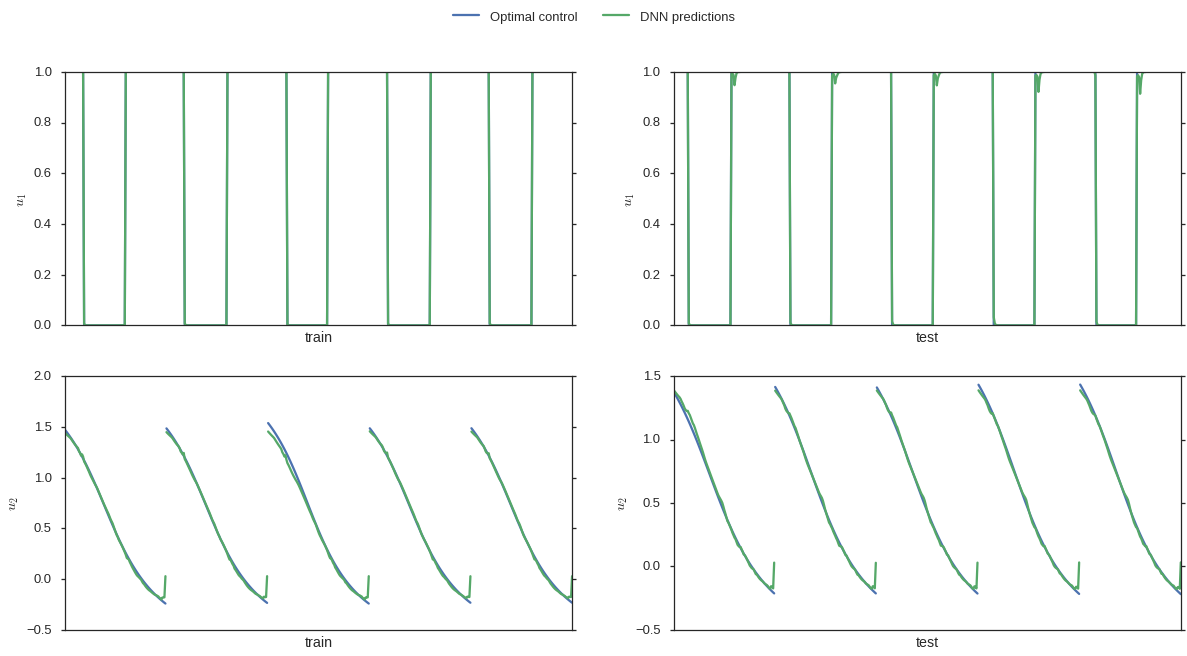

In [22]:
plt.rcParams['figure.figsize'] = [20,5*len(networks)]

fig = plt.figure()

batch = 1000
b = 10
traj_length = 100

for s, dset in enumerate(['train', 'test']):
    for i,(model,network) in enumerate(networks):
        plt.subplot(len(networks), 2, i*2+s+1)
        u = np.zeros((batch,len(networks)))
        network_input = data['X_'+dset][b*batch:(b+1)*batch,:]
        ui = network['pred'](network_input) 
        u[:,i] = ui[:,0]

        u = dc.nn.postprocess(model, u)
        u_gt = data['Y_'+dset][b*batch:(b+1)*batch,:].copy()        
        u_gt = dc.nn.postprocess(model, u_gt)   
                
        for j in range(5):
            label_1, = plt.plot(np.arange(traj_length)+j*traj_length,u_gt[j*traj_length:(j+1)*traj_length,i], c=sns.color_palette()[0])
        
        plt.gca().get_xaxis().set_ticks([])
        plt.ylabel(r'$' + 'u_'+str(i+1)+'$')
        ylims = plt.ylim()

        plt.subplot(len(networks), 2, i*2+s+1)        
        for j in range(5):
            label_2, = plt.plot(np.arange(traj_length)+j*traj_length, u[j*traj_length:(j+1)*traj_length,i], c=sns.color_palette()[1])
        
        #plt.locator_params(axis='y', nbins=1)
        plt.gca().get_xaxis().set_ticks([])
        plt.ylim(ylims)
        plt.xlabel(dset)
                
plt.figlegend([label_1,label_2], ['Optimal control', 'DNN predictions'], loc='upper center', ncol=2)


In [248]:
from lasagne import  layers
params = layers.get_all_params(network_dth['layers'])

In [249]:
params = [(params[2*p].get_value(), 
           params[2*p+1].get_value()) for p in range(int(len(params)/2))]

In [250]:
f = open('nn.params', 'wt')
f.write('L{0}\n'.format(len(params)))
for i, layer in enumerate(params):
    f.write('W{0},{1},{2}\n'.format(i,layer[0].shape[1],layer[0].shape[0]))
    for j in range(layer[0].shape[1]):
        for k in range(layer[0].shape[0]):
            f.write('{0:.16}\t'.format(layer[0][k,j]))
        f.write('\n')
    f.write('b{0},{1},{2}\n'.format(i,1,layer[1].shape[0]))
    for w in layer[1]:
        f.write('{0:.16}\t\n'.format(w))
        
f.close()

In [276]:
x = np.atleast_2d([0,2,0,1,0])

In [277]:
network_dth['pred'](x)

array([[ 0.17155261]])